This file analyses our algorithm's complexity on varying problem sizes

In [2]:
import pickle

# Load the data
try:
    with open('../AllSizesNode3Regular_d_data_scale.pkl', 'rb') as file:
        data_dict = pickle.load(file)
except FileNotFoundError:
    print("Data file not found. Make sure 'AllSizesNode3Regular_d_data_scale.pkl' exists in the current directory.")
    data_dict = {}

# Check the number of data points for each graph size
for size in [80, 100, 120, 140, 160, 180]:
    if size in data_dict:
        num_points = len(data_dict[size])
        print(f"Graph size {size}: {num_points} data points")
    else:
        print(f"Graph size {size}: No data available")

# Check the progress for size 180
if 180 in data_dict:
    progress = len(data_dict[180])
    print(f"\nProgress for size 180: {progress}/80 data points completed")
else:
    print("\nNo data available for size 180 yet")


Graph size 80: 80 data points
Graph size 100: 80 data points
Graph size 120: 80 data points
Graph size 140: 80 data points
Graph size 160: 80 data points
Graph size 180: 7 data points

Progress for size 180: 7/80 data points completed


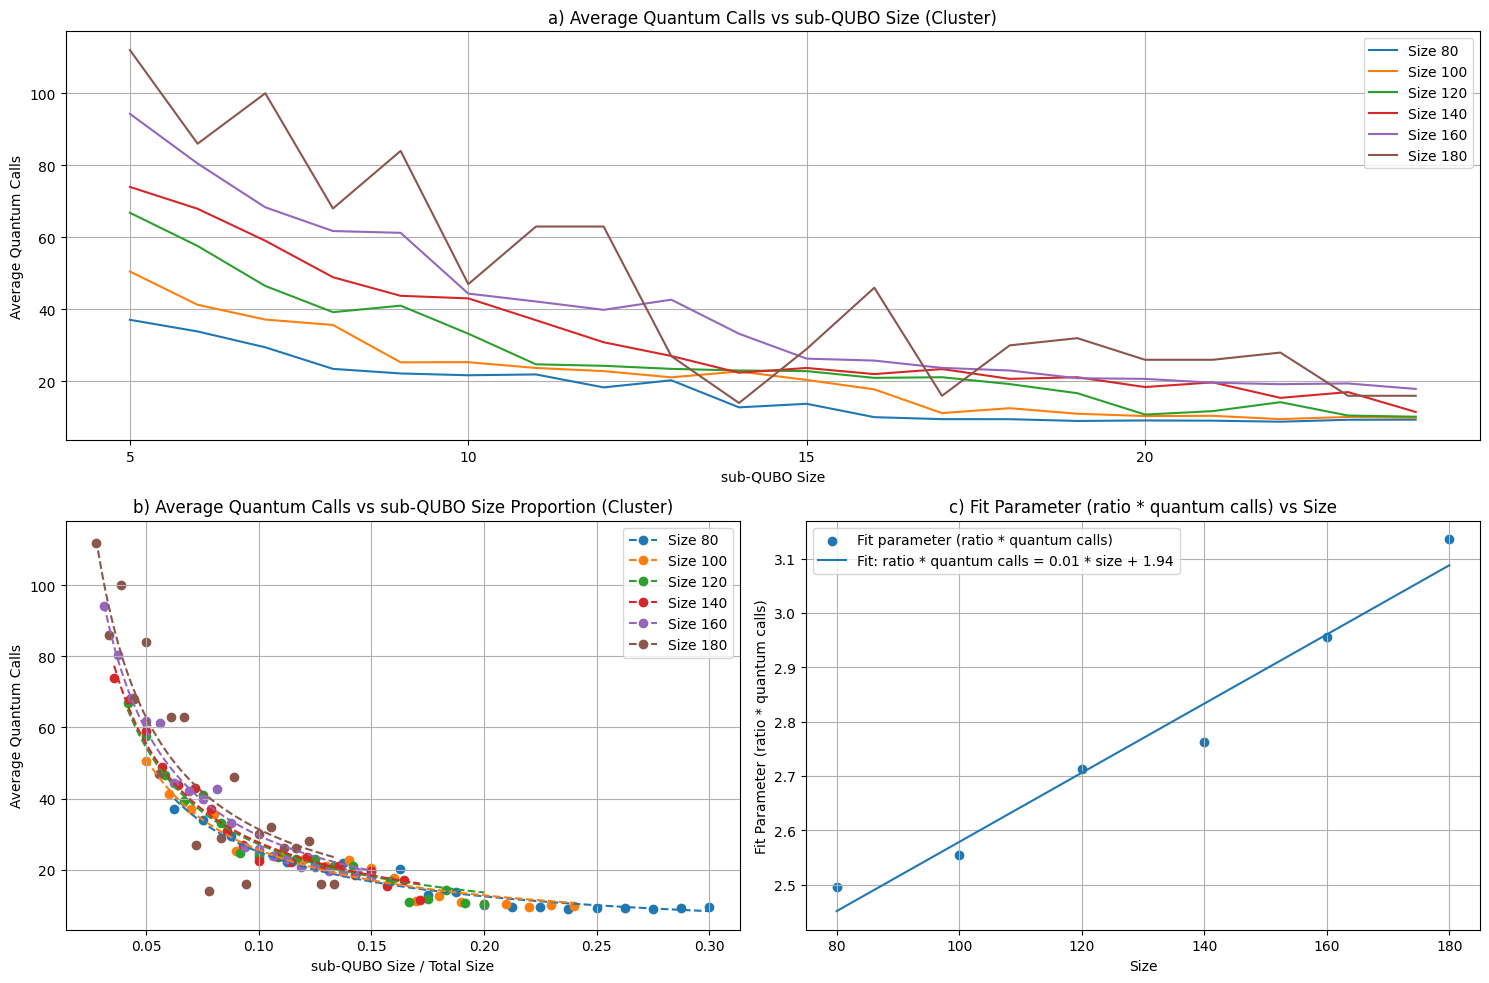

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit

def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

def process_data(data, key):
    processed_results = {}
    for size in [80, 100, 120, 140, 160, 180]:
        data_list = data[size]
        avg_values = {}
        for entry in data_list:
            for qubit_size, result in entry[key].items():
                if qubit_size not in avg_values:
                    avg_values[qubit_size] = []
                # Assuming result is a dictionary and the function value is under 'val' key
                if 'val' in result:
                    avg_values[qubit_size].append(result['quantum_calls'])
                else:
                    print(f"Unexpected result structure for size {size}, qubit_size {qubit_size}: {result}")

        avg_values = {k: np.mean(v) for k, v in avg_values.items()}
        processed_results[size] = avg_values

    return processed_results

def linear_fit(x, a, b):
    return a * x + b

def inverse_fit(x, a):
    return a / x

def plot_results(processed_results):
    fig = plt.figure(figsize=(15, 15))
    
    # Create a 2x2 grid layout, but only use 3 subplots
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)  # Top subplot spans both columns
    ax2 = plt.subplot2grid((3, 2), (1, 0))  # Bottom left subplot
    ax3 = plt.subplot2grid((3, 2), (1, 1))  # Bottom right subplot
    
    fit_params = []

    # Plot for cluster method
    for size, avg_values in processed_results.items():
        x = np.array(list(avg_values.keys()))
        y = np.array(list(avg_values.values()))
        arg = np.argsort(x)
        ax1.plot(x[arg], y[arg], label=f'Size {size}')
    
    # Ensure x-axis does not have decimal values
    ax1.xaxis.get_major_locator().set_params(integer=True)
    
    # Plot for impact method with inverse fit
    for size, avg_values in processed_results.items():
        x = np.array(list(avg_values.keys()))
        y = np.array(list(avg_values.values()))
        x_scaled = x / size
        ax2.scatter(x_scaled, y, label=f'Size {size}')
        
        # Fit the data to an inverse function
        popt, _ = curve_fit(inverse_fit, x_scaled, y)
        fit_params.append((size, popt[0]))
        x_fit = np.linspace(min(x_scaled), max(x_scaled), 100)
        y_fit = inverse_fit(x_fit, *popt)
        ax2.plot(x_fit, y_fit, linestyle='--')
    
    # Combine scatter and line in legend
    handles, labels = ax2.get_legend_handles_labels()
    new_handles = [plt.Line2D([], [], marker='o', linestyle='--', color=h.get_edgecolor()) for h in handles[:len(processed_results)]]
    ax2.legend(new_handles, labels)

    # Plot the fit parameter a vs size
    sizes, a_values = zip(*fit_params)
    ax3.scatter(sizes, a_values, label='Fit parameter (ratio * quantum calls)')
    
    # Linear fit for the parameter a
    popt, _ = curve_fit(linear_fit, sizes, a_values)
    x_fit = np.linspace(min(sizes), max(sizes), 100)
    y_fit = linear_fit(x_fit, *popt)
    ax3.plot(x_fit, y_fit, linestyle='-', label=f'Fit: ratio * quantum calls = {popt[0]:.2f} * size + {popt[1]:.2f}')

    # Labels and titles
    ax1.set_xlabel('sub-QUBO Size')
    ax1.set_ylabel('Average Quantum Calls')
    ax1.set_title('a) Average Quantum Calls vs sub-QUBO Size (Cluster)')
    ax1.legend()
    ax1.grid(True)
    
    ax2.set_xlabel('sub-QUBO Size / Total Size')
    ax2.set_ylabel('Average Quantum Calls')
    ax2.set_title('b) Average Quantum Calls vs sub-QUBO Size Proportion (Cluster)')
    ax2.grid(True)
    
    ax3.set_xlabel('Size')
    ax3.set_ylabel('Fit Parameter (ratio * quantum calls)')
    ax3.set_title('c) Fit Parameter (ratio * quantum calls) vs Size')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to reduce bottom space
    plt.savefig('../fig/calls.pdf')

# Load and process the data from the pickle file
filename = '../AllSizesNode3Regular_d_data_scale.pkl'
data = load_data(filename)

# Process the data for 'results_cluster'
processed_results_cluster = process_data(data, 'results_cluster')

# Plot the results
plot_results(processed_results_cluster)


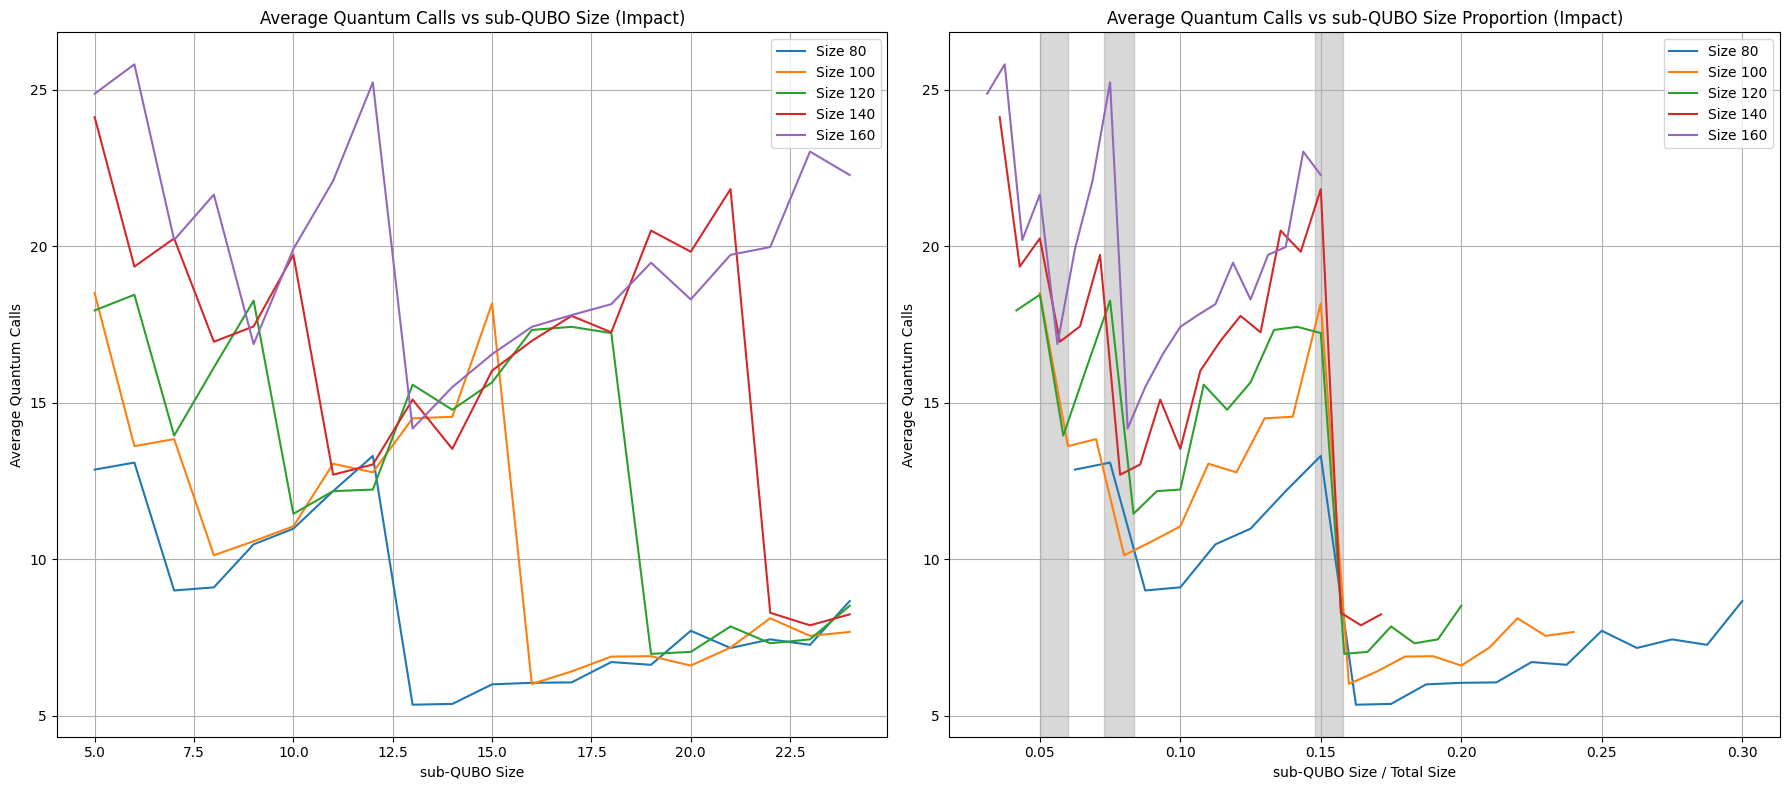

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

def process_data(data, key):
    processed_results = {}
    for size in [80, 100, 120, 140, 160]:
        data_list = data[size]
        avg_values = {}
        for entry in data_list:
            for qubit_size, result in entry[key].items():
                if qubit_size not in avg_values:
                    avg_values[qubit_size] = []
                # Assuming result is a dictionary and the function value is under 'val' key
                if 'val' in result:
                    avg_values[qubit_size].append(result['quantum_calls'])
                else:
                    print(f"Unexpected result structure for size {size}, qubit_size {qubit_size}: {result}")

        avg_values = {k: np.mean(v) for k, v in avg_values.items()}
        processed_results[size] = avg_values

    return processed_results

def plot_results(processed_results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Define the jump points for shading
    jump_points = [(0.05, 0.06), (0.073, 0.0835), (0.148, 0.158)]

    # Plot for impact method with sub-QUBO size
    for size, avg_values in processed_results.items():
        x = np.array(list(avg_values.keys()))
        y = np.array(list(avg_values.values()))
        arg = np.argsort(x)
        ax1.plot(x[arg], y[arg], label=f'Size {size}')
    
    # Plot for impact method with sub-QUBO size / total size
    for size, avg_values in processed_results.items():
        x = np.array(list(avg_values.keys()))
        y = np.array(list(avg_values.values()))
        x_scaled = x / size
        arg = np.argsort(x_scaled)
        ax2.plot(x_scaled[arg], y[arg], label=f'Size {size}')
    
    # Add vertical shading for jump points
    for start, end in jump_points:
        ax2.axvspan(start, end, color='gray', alpha=0.3)

    ax1.set_xlabel('sub-QUBO Size')
    ax1.set_ylabel('Average Quantum Calls')
    ax1.set_title('Average Quantum Calls vs sub-QUBO Size (Impact)')
    ax1.legend()
    ax1.grid(True)
    
    ax2.set_xlabel('sub-QUBO Size / Total Size')
    ax2.set_ylabel('Average Quantum Calls')
    ax2.set_title('Average Quantum Calls vs sub-QUBO Size Proportion (Impact)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('../fig/calls_impact.pdf')

# Load and process the data from the pickle file
filename = '../AllSizesNode3Regular_d_data_scale.pkl'
data = load_data(filename)

# Process the data for 'results_impact'
processed_results_impact = process_data(data, 'results_pool')

# Plot the results
plot_results(processed_results_impact)


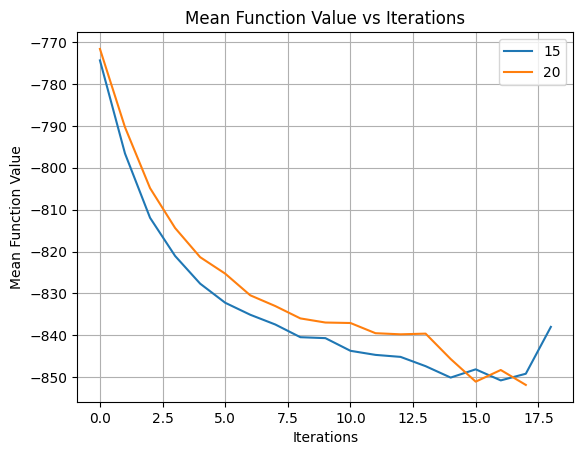

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 data 已经被定义并包含需要的数据
cv_20 = [data[120][i]['results_cluster'][20]['classical_values'] for i in range(80)]
cv_15 = [data[120][i]['results_cluster'][15]['classical_values'] for i in range(80)]

# 转换为 DataFrame
cv_15_df = pd.DataFrame(cv_15)
cv_20_df = pd.DataFrame(cv_20)

# 计算每轮次的数据量，并过滤掉数据量过少的轮次
cv_15_counts = cv_15_df.count()
cv_20_counts = cv_20_df.count()

threshold = 10  # 设定一个阈值，比如10
filtered_cv_15 = cv_15_df.loc[:, cv_15_counts >= threshold]
filtered_cv_20 = cv_20_df.loc[:, cv_20_counts >= threshold]

# 绘制均值曲线
filtered_cv_15.mean().plot(label='15')
filtered_cv_20.mean().plot(label='20')

# 添加图例
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Mean Function Value')
plt.title('Mean Function Value vs Iterations')
plt.grid(True)
plt.show()


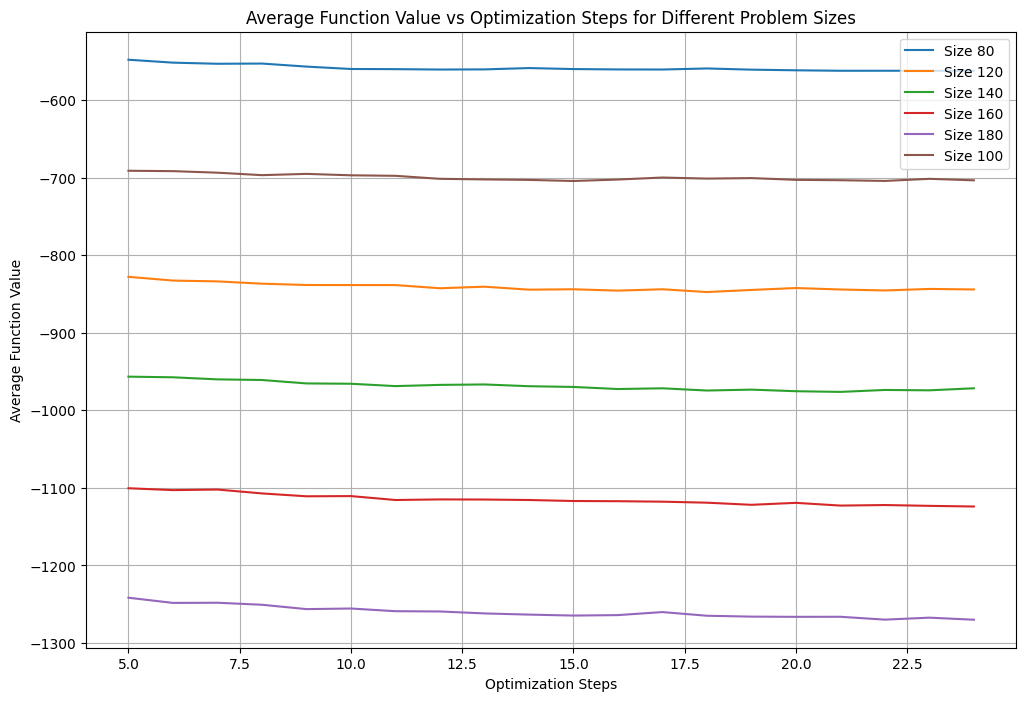

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tqdm import tqdm

def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

def process_data(data):
    processed_results = {}
    for size, data_list in data.items():
        # if size !=120:
        #     continue
        avg_values = {}
        for entry in data_list:
            for qubit_size, result in entry['results_cluster'].items():
                if qubit_size not in avg_values:
                    avg_values[qubit_size] = []
                # Assuming result is a dictionary and the function value is under 'val' key
                if 'val' in result:
                    avg_values[qubit_size].append(result['val'])
                else:
                    print(f"Unexpected result structure for size {size}, qubit_size {qubit_size}: {result}")

        avg_values = {k: np.mean(v) for k, v in avg_values.items()}
        processed_results[size] = avg_values
    return processed_results

def plot_results(processed_results):
    plt.figure(figsize=(12, 8))
    
    for size, avg_values in processed_results.items():
        x = np.array(list(avg_values.keys()))
        y = np.array(list(avg_values.values()))
        arg = np.argsort(x)
        plt.plot(x[arg], y[arg], label=f'Size {size}')
    
    plt.xlabel('Optimization Steps')
    plt.ylabel('Average Function Value')
    plt.title('Average Function Value vs Optimization Steps for Different Problem Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and process the data from the pickle file
filename = 'AllSizesNode3Regular_d_data_scale.pkl'
data = load_data(filename)
processed_results_all = process_data(data)

# Plot the results
plot_results(processed_results_all)
